In [1]:
import pandas as pd

from Strava.StravaData import StravaData
from Strava.StravaHeatmap import *

In [10]:
# Arguments
# Audrey - 18301580
# Ethan - 22985222
# Amy - 23312763

athlete_id = 23312763
activity_type = 'Run'   # 'Run' or 'Ride'
location = 'South Manchester'

In [11]:
# Location
# Use https://www.openstreetmap.org/
location_limit = True
if location == 'Cambridge':
    lat_lower = 52.0
    lat_upper = 59
    long_lower = -10
    long_upper = 0.2
elif location == 'Reading':
    lat_lower = 51.395994
    lat_upper = 51.482861
    long_lower = -1.041013
    long_upper = -0.751203
elif location == 'England':
    lat_lower = 49
    lat_upper = 54
    long_lower = -10
    long_upper = 3
elif location == 'South Manchester':
    lat_lower = 53.2
    lat_upper = 53.5
    long_lower = -2.4
    long_upper = -2.1
else:
    location = 'Everywhere'
    location_limit = False

In [12]:
print('Collecting the coordinates...')

strava_data = StravaData(athlete_id=athlete_id)

coordinates = []
num_activites = 0

for id in strava_data.activities.index:
    if strava_data.activities.loc[id, 'Activity Type'] == activity_type:
        file = os.path.join(strava_data.activity_folder, f"{id}.csv")
        if os.path.exists(file):
            data = pd.read_csv(file, index_col=0)
            
            c1 = False
            c2 = False
            
            if location_limit:
                c1 = all(data.position_lat.between(lat_lower, lat_upper))
                c2 = all(data.position_long.between(long_lower, long_upper))
            else:
                c1 = True
                c2 = True
        
            # GPS within area
            if c1 and c2:
                # print(f"Logging: Activity {id} is in {location}")
                num_activites += 1
                for index in data.index:
                    coordinates.append([float(data.loc[index, 'position_lat']),
                                        float(data.loc[index, 'position_long'])])

coordinates = np.array(coordinates)

if coordinates.size == 0:
    exit(f"Error: No data for athlete {athlete_id} for {activity_type} in location {location}")

print(f"Logging: {num_activites} activities")
print(f"Logging: {len(coordinates)} points")
print()

Logging: 17 activities
Logging: 5572 points



In [13]:
from Strava.StravaHeatmap import *

In [28]:
# Arguments
sigma_pixels = 3
use_cumululative_distribution = True
reduce_points = 20

In [29]:
strava_heatmap = StravaHeatmap(coordinates, num_activites,
                               athlete_id=athlete_id, 
                               location=location, 
                               activity_type=activity_type,
                               sigma_pixels=sigma_pixels,
                               use_cumululative_distribution=use_cumululative_distribution,
                               reduce_points=reduce_points)

strava_heatmap.determine_tiles()
strava_heatmap.download_tiles()
strava_heatmap.create_heatmap()


Determine tiles...
Logging: 14 zoom
Logging: 40 tiles

Download tiles...

Creating heatmap...



Plotting heatmap...


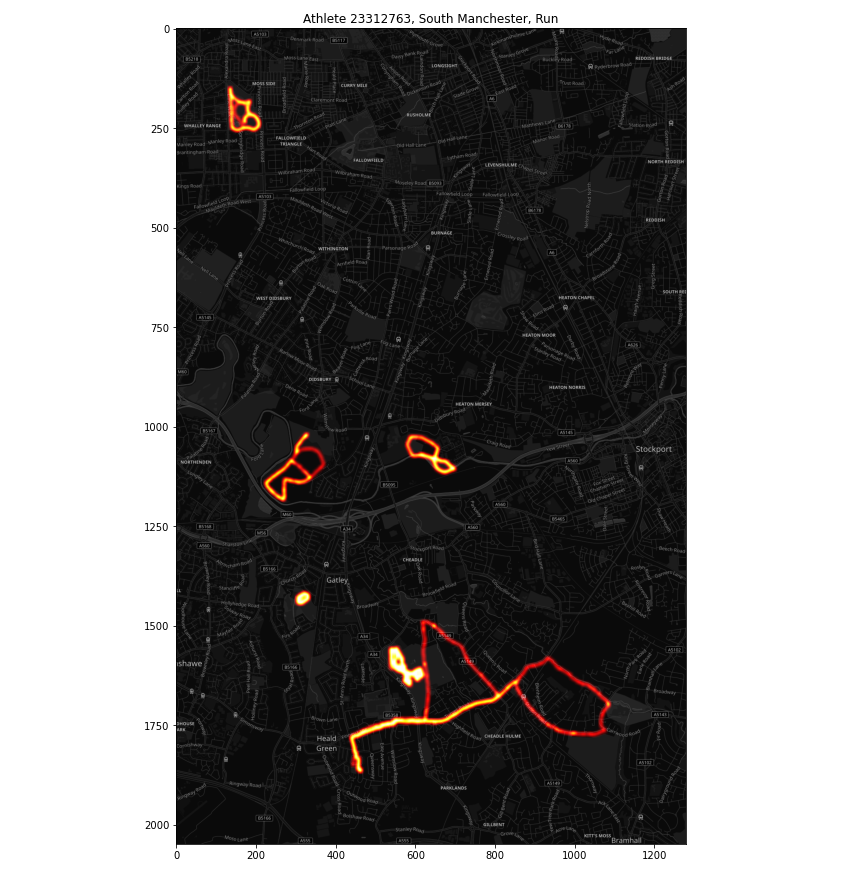

In [30]:
strava_heatmap.plot_heatmap()

In [31]:
strava_heatmap.save_heatmap()

Saving heatmap...

